### Coursework 2

In this coursework you will be aiming to complete two classification tasks. 
Both the classification tasks relate to text classification tasks. 

One task is to be solved using Support Vector Machines. The other has to be solved using Boosting.

The specific tasks and the marking for the various tasks are provided in the notebook. Each task is expected to be accompanied by a lab-report. Each task can have a concise lab report that is maximum of one page in an A4 size. You will be expected to submit your Jupyter Notebook and all lab reports as a single zip file. You could have additional functions implemented that you require for carrying out each task.


#### Task 1

In this task, you need to obtain sentiment analysis for the provided dataset. The dataset consists of movie reviews with the sentiments being provided. The sentiments are either positive or negative. You need to train an SVM based classifier to obtain train and check on the sample test dataset provided. The method will be evaluated also against an external test set. Please do not hardcode any dimensions or number of samples while writing the code. It should be possible to automate the testing and hardcoding values does not allow for automated testing. 

You are allowed to use scikit-learn to implement the SVM. However, you are expected to write your own kernels.

You are allowed to use the existing library functions such as scikit-learn or numpy for obtaining the SVM. The main idea is to analyse the dataset using different kind of kernels. You are also supposed to write your own custom text kernels. Refer to the documentation provided [here](https://scikit-learn.org/stable/modules/svm.html) at 1.4.6.2 and an example [here](https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html) for writing your own kernels.

Details regarding the marking have been provided in the coursework specification file. Ensure that the code can be run with different test files. 

#### Process the text and obtain a bag of words-based features 

In [112]:

import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

data_cache = {'Train_path':'', 'Test_path':'', 'X_train':None, 'y_train':None, 'X_test': None, 'y_train':None}

def clear_cache():
    data_cache['Test_path'] = ''
    data_cache['Train_path'] = ''
    data_cache['X_train'] = None
    data_cache['y_train'] = None
    data_cache['X_test'] = None
    data_cache['y_test'] = None
    
def load_data(train_file, test_file):
    # Read the CSV file and extract Bag of Words Features
    
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)
    
    raw_X_train = list(train_df.review)
    y_train = list(map( (lambda x : 0 if x == 'negative' else 1), train_df.sentiment))
    
    raw_X_test = list(test_df.review)
    y_test = list(map( (lambda x : 0 if x == 'negative' else 1), test_df.sentiment))
    
    return raw_train_x, train_y, raw_test_x, test_y 

# def clean_review(review):
#     #review = word_tokenize(review)
#     review = "".join([i for i in review if i not in string.punctuation])
#     #stop_words = set(stopwords.words('english'))
#     #review = [w for w in review if not w in stop_words]
    
#     return review

def extract_bag_of_words_train_test(train_file, test_file):
    if(data_cache['X_train'] is not None 
        and data_cache['y_train'] is not None
        and data_cache['X_test']is not None
        and data_cache['y_test'] is not None
        and data_cache['Train_path'] == train_file
        and data_cache['Test_path'] == test_file):
        print('Getting from cache')
        return (data_cache['X_train'], data_cache['y_train'], data_cache['X_test'], data_cache['y_test'])

    # Read the CSV file and extract Bag of Words Features
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)
    
    raw_X_train = list(train_df.review)
    raw_X_train = [clean_review(review) for review in raw_X_train]
    y_train = list(map( (lambda x : 0 if x == 'negative' else 1), train_df.sentiment))
    
    raw_X_test = list(test_df.review)
    raw_X_test = [clean_review(review) for review in raw_X_test]
    y_test = list(map( (lambda x : 0 if x == 'negative' else 1), test_df.sentiment))
    
    X_train = get_embeddings(raw_X_train)
    X_test  = get_embeddings(raw_X_test)
    
    data_cache['Test_path'] = test_file
    data_cache['Train_path'] = train_file
    data_cache['X_train'] = X_train
    data_cache['y_train'] = y_train
    data_cache['X_test'] = X_test
    data_cache['y_test'] = y_test
    return (X_train, y_train, X_test, y_test)

def get_embeddings(reviews):
    #
    from sentence_transformers import SentenceTransformer
    embedding_length = 128
    embeddings = []
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
    model.max_seq_length = embedding_length
    
    for review in reviews:
        if len(review.split(' ')) <= embedding_length:
            embeddings.append(model.encode(review))
        else:
            ## If the review is longer than the maximum supported sequence length then embed in chunks and average
            ## chunks overlap by 15 words to preserve some semantic continuity between chunks
            split_review = review.split(' ')
            split_review = [' '.join(split_review[i:i+embedding_length+15]) for i in range(0,len(split_review),embedding_length-15)]
            split_embeddings = []
            split_lens = []
            for split in split_review:
                split_lens.append(len(split))
                embedding = model.encode(split)
                split_embeddings.append(embedding)
            embeddings.append(np.average(np.array(split_embeddings), axis = 0, weights = split_lens))
                
    return np.array(embeddings)


train_file = 'movie_review_test.csv'
test_file =  'movie_review_test.csv'

#x_test, y_train, x_test, y_test = extract_bag_of_words_train_test(train_file, test_file)
#embeddings = get_embeddings(x)

# print(len(x), len(y))
# print(len(embeddings))

In [83]:
X_train, y_train, X_test, y_test  = extract_bag_of_words_train_test("movie_review_train.csv", "movie_review_test.csv")



(2, 384)
[2743  273]
2
(2, 384)
[3105  555]
2
(2, 384)
[3028  850]
2
(2, 384)
[2787 1033]
2
(2, 384)
[2734  522]
2
(2, 384)
[2754  483]
2
(2, 384)
[2737   55]
2
(2, 384)
[2721 1321]
2
(2, 384)
[2672  279]
2
(2, 384)
[3105 1992]
2
(2, 384)
[2850  606]
2
(2, 384)
[3004 1498]
2
(2, 384)
[2878  191]
2
(2, 384)
[2796  107]
2
(2, 384)
[2771   70]
2
(2, 384)
[2876 1495]
2
(2, 384)
[2708  268]
2
(2, 384)
[2995  737]
2
(2, 384)
[2738 2143]
2
(2, 384)
[2889  236]
2
(2, 384)
[2828  772]
2
(2, 384)
[2765  365]
2
(2, 384)
[2764 2823]
2
(2, 384)
[2905 2367]
2
(2, 384)
[2788 1165]
2
(2, 384)
[2780  344]
2
(2, 384)
[2904  928]
2
(2, 384)
[2779 1501]
2
(2, 384)
[2761  238]
2
(2, 384)
[2804 2662]
2
(2, 384)
[2874 1101]
2
(2, 384)
[3053 1401]
2
(2, 384)
[2578  926]
2
(2, 384)
[2593  631]
2
(2, 384)
[2865   50]
2
(2, 384)
[2926 1161]
2
(2, 384)
[2708   47]
2
(2, 384)
[2852  686]
2
(2, 384)
[2863  778]
2
(2, 384)
[2760  821]
2
(2, 384)
[2739  901]
2
(2, 384)
[2821 2695]
2
(2, 384)
[2712 2013]
2
(2, 384)
[2

KeyboardInterrupt: 

In [23]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')#'sentence-transformers/paraphrase-MiniLM-L3-v2')
model.max_seq_length = 1024
model.max_seq_length

1024

In [38]:
import numpy as np
from sklearn import svm

class SVMClassifier:
    def __init__(self):
        
        #implement initialisation
        #self.some_paramter=1
        self.clf = svm.SVC(decision_function_shape='ovo')
        self.clf.kernel = 'rbf'
        
    # define your own kernel here
    # Refer to the documentation here: https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html
    def fit(self, X,y):
        # training of the SVM
        # Ensure you call your own defined kernel here

        self.clf.fit(X, y)
               
        return
    
    def predict(self, X):
        # prediction routine for the SVM
        predictions = self.clf.predict(X)
        #print('predictions:', len(predictions))
        
        return predictions

### Test function that will be called to evaluate your code. Separate test dataset will be provided

Do not modify the code below. Please write your code above such that it can be evaluated by the function below. You can modify your code above such that you obtain the best performance through this function. 

In [39]:
from sklearn.metrics import accuracy_score

def test_func_svm(dataset_train, dataset_test):    
    (X_train, Y_train, X_test, Y_test) = extract_bag_of_words_train_test(dataset_train, dataset_test)
    sc = SVMClassifier()
    #print(X_train, Y_train)
    sc.fit(X_train, Y_train)
    Y_Pred = sc.predict(X_test)
    acc = accuracy_score(Y_test, Y_Pred)
    #print("Accuracy:",acc)
    return acc

def test_svm(model, train_x, train_y, test_x, test_y):  
    sc = model 
    #print(X_train, Y_train)
    sc.fit(train_x, train_y)
    Y_Pred = sc.predict(test_x)
    acc = accuracy_score(test_y, Y_Pred)
    #print("Accuracy:",acc)
    return acc

def crossval_svm(model, x, y, kfolds = 5):
    from sklearn.model_selection import KFold
    
    kfold_accuracys = []
    
    kf = KFold(n_splits = kfolds)
    train_x = kf.split(x,y)
    #print(train_x)
    
    
    for train_index, val_index in kf.split(x):
        train_x = x[train_index]
        train_y = y[train_index]
        val_x = x[val_index]
        val_y = y[val_index]
        
        acc = test_svm(model, train_x, train_y, val_x, val_y)
        #print(acc)
        kfold_accuracys.append(acc)
        
    return np.mean(kfold_accuracys)
        


In [40]:
X_train, y_train, X_test, y_test  = extract_bag_of_words_train_test("movie_review_train.csv", "movie_review_test.csv")



Getting from cache


[nltk_data] Downloading package punkt to /home/daniel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
#
model = SVMClassifier()
#Hyperparams chosen with grid search, need to implement params in the wrapper constructor
#model.clf = svm.SVC(decision_function_shape='ovo', kernel = 'rbf', gamma = 1, C = 1)

model.clf = svm.SVC(decision_function_shape='ovo', kernel = 'poly', degree = 1, C = 1)
cross_val_acc = crossval_svm(model, X_train, np.array(y_train))

test_acc = test_func_svm("movie_review_train.csv", "movie_review_test.csv")

print("Cross val accuracy: ", cross_val_acc, "Test accuracy: ", test_acc)

[nltk_data] Downloading package punkt to /home/daniel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Getting from cache
Cross val accuracy:  0.5138 Test accuracy:  0.528


In [62]:
### rbf hyperparam tuning - very slow do not run - it resulted in c=1, gamma=1
from sklearn.model_selection import GridSearchCV,StratifiedKFold

C_range = 10. ** np.linspace(-3, 3, 15)
gamma_range = 10. ** np.linspace(-3,4, 15)
distributions = dict(C = uniform(loc=10e-3, scale=10e3), gamma = uniform(loc=10e-3, scale=10e3))

#hyperparameters = {'C':C_range, 'gamma':gamma_range}
svc = SVMClassifier()
tuner = RandomizedSearchCV(svm.SVC(), distributions, scoring='accuracy', n_iter=20, random_state=0)
tuner.fit(X_train, y_train)

print(tuner.best_params_)

{'C': 5488.145039273248, 'gamma': 7151.903663724195}


In [15]:
### polynomial hyperparam tuning - it chose 1, 1 again
from sklearn.model_selection import GridSearchCV,StratifiedKFold

C_range = 10. ** np.linspace(-3, 3, 15)
degree_range = np.linspace(1, 20, 6)

hyperparameters = {'kernel': ['poly'], 'C':C_range, 'degree':degree_range}
svc = SVMClassifier()
tuner = GridSearchCV(svc.clf, hyperparameters,scoring = 'accuracy', cv=StratifiedKFold(5))
tuner.fit(X_train, y_train)

print(tuner.best_params_)

{'C': 1.0, 'degree': 1.0, 'kernel': 'poly'}


### Task 2

In this task you need to implement a boosting based classifier that can be used to classify the images. 

Details regarding the marking for the coursework are provided in the coursework specification file. Please ensure that your code will work with a different test file than the one provided with the coursework.

Note that the boosting classifier you implement can include decision trees from scikit-learn or your own decision trees. Use the same sentiment analysis dataset for evaluation.

In [120]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import math
import random


class BoostingClassifier:
    # You need to implement this classifier. 
    def __init__(self, num_classifiers = 100, max_depth = 2):
        import numpy as np
        #implement initialisation
        self.num_classifiers = num_classifiers
        self.max_depth = max_depth
        self.classifiers = []
        self.alphas = np.ones(self.num_classifiers)
        self.alphas /= self.num_classifiers
        
    def fit(self, X,y):
        signed_y = [1 if x == 1 else -1 for x in y]
        num_samples = X.shape[0]
        w = np.random.rand(num_samples)
        w /= num_samples
        alph = np.ones(self.num_classifiers)
        #print(signed_y)
        for c in range(self.num_classifiers):
#             plt.hist(w)
#             plt.show()
            
            clf = tree.DecisionTreeClassifier(max_depth = self.max_depth)#splitter='random')
            self.classifiers.append(clf)
            
#             random_w = np.random.rand(num_samples)
#             random_w /= np.sum(random_w)
            clf.fit(X, signed_y, sample_weight = w)
            
            #get predictions and calculate error rate
            predictions = clf.predict(X)     
            error_rate = np.count_nonzero(predictions != signed_y) / num_samples
            #print(error_rate)
            #print('training:', h[:5])
            #set classifier weight
            alpha = 0.5 * math.log((1-error_rate)/error_rate) if error_rate > 0 else 1
            self.alphas[c]  = alpha
            #update sample weights
            
            new_w = np.copy(w)
            for i in range(num_samples):
                w[i] = w[i] * math.exp(-1 * alpha * signed_y[i] * predictions[i])
                
            w /= np.sum(new_w)
        
#         plt.hist(w)
#         plt.show() 
#         plt.hist(self.alphas)
#         plt.show()
        #implement training of the boosting classifier
        return self
    
    def get_params(self, deep= False):
        return {'num_classifiers':self.num_classifiers, 'max_depth':self.max_depth}
    
    def predict(self, X):
        # implement prediction of the boosting classifier
        h = []
        accum = []
        for x in X:
            cumsum = 0
            for c in range(self.num_classifiers):
                cumsum += self.alphas[c] * self.classifiers[c].predict(np.array(x).reshape(1,-1))
                accum.append(cumsum)
                #print(cumsum)
            h.append(np.sign(cumsum))
        #print('predicting:', h[:5])
        return [0 if x < 0 else 1 for x in h]

### Test function that will be called to evaluate your code. Separate test dataset will be provided

Do not modify the code below. Please write your code above such that it can be evaluated by the function below. You can modify your code above such that you obtain the best performance through this function. 

In [3]:
def test_func_boosting(dataset_train, dataset_test):
    from sklearn.metrics import accuracy_score    
    X_train, Y_train, X_test, Y_test = extract_bag_of_words_train_test(dataset_train, dataset_test)
    bc = BoostingClassifier()
    bc.fit(X_train, Y_train)
    #print(X_test.shape)
    Y_Pred = bc.predict(X_test)
    #print(np.array(Y_test).shape, np.array(Y_Pred).shape)
    acc = accuracy_score(Y_test, Y_Pred)
    return acc

In [122]:
acc = test_func_boosting("movie_review_train.csv", "movie_review_test.csv")
print("Acc:", acc)

Getting from cache
Acc: 0.744


In [9]:
from sklearn.metrics import accuracy_score  
def crossval_boost(model, x, y, kfolds = 5):
    from sklearn.model_selection import KFold
    
    kfold_accuracys = []
    
    kf = KFold(n_splits = kfolds)
    train_x = kf.split(x,y)
    #print(train_x)
    
    
    for train_index, val_index in kf.split(x):
        #print(train_index, val_index)
        train_x = x[train_index]
        train_y = y[train_index]
        val_x = x[val_index]
        val_y = y[val_index]
        
        bc = BoostingClassifier()
        bc.fit(train_x, train_y)
        Y_Pred = bc.predict(val_x)
        acc = accuracy_score(val_y, Y_Pred)
        
        #print(acc)
        kfold_accuracys.append(acc)
        
    return np.mean(kfold_accuracys)

In [118]:
## Hyperparam tuning for gradboost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

#X_train, y_train, X_test, Y_test = extract_bag_of_words_train_test("movie_review_train.csv", "movie_review_test.csv")


def grid_search(params):
    X_train, y_train, X_test, Y_test = extract_bag_of_words_train_test("movie_review_train.csv", "movie_review_test.csv")
    clfs = []
    best_acc = 0

    for num in params['num_classifiers']:
        for max_depth in params['max_depth']:
            clfs.append(BoostingClassifier(num, max_depth))
    for clf in clfs:
        accuracy = crossval_boost(clf, X_train, np.array(y_train), 5)
        print('Acc:' , accuracy, 'Params:', clf.num_classifiers, clf.max_depth)
        if accuracy > best_acc:
            best_clf = clf
            best_acc = accuracy
            
    print("Best Params:", best_clf.num_classifiers, best_clf.max_depth)
    return best_clf
    
grid = {'num_classifiers': [50, 100, 200, 500], 'max_depth': [1]}
best_clf = grid_search(grid)

Getting from cache


KeyboardInterrupt: 

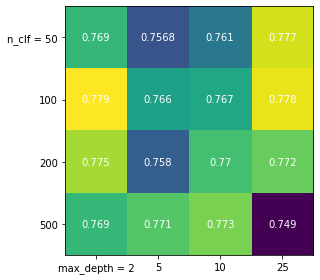

In [113]:
tuning = np.array([[0.769, 0.7568, 0.761, 0.777],
                  [0.779, 0.766, 0.767, 0.778],
                  [0.775, 0.758, 0.770, 0.772],
                  [0.769, 0.771, 0.773, 0.749]])

fig, ax = plt.subplots()
im = ax.imshow(tuning)


# Loop over data dimensions and create text annotations.
for i in range(tuning.shape[0]):
    for j in range(tuning.shape[1]):
        text = ax.text(j, i, tuning[i, j],
                       ha="center", va="center", color="w")

ax.set_yticks(np.arange(4), labels=['n_clf = 50', 100, 200, 500])
ax.set_xticks(np.arange(4), labels=['max_depth = 2', 5, 10, 25])
fig.tight_layout()
plt.show()

In [135]:
X_train, y_train, X_test, Y_test = extract_bag_of_words_train_test("movie_review_train.csv", "movie_review_test.csv")
raw_X_test = pd.read_csv("movie_review_test.csv")


# bc = BoostingClassifier()
# bc.fit(X_train, y_train)

Y_Pred = bc.predict(X_test)
#print(raw_X_test)

correct_indices = np.nonzero(np.equal(Y_Pred, Y_test))
misclassified_indices = np.nonzero(np.not_equal(Y_Pred, Y_test))

correct_samples = raw_X_test.iloc[correct_indices]
misclassified_samples = raw_X_test.iloc[misclassified_indices]

print(correct_samples)
print(misclassified_samples)

# correct_reviews = correct_samples['review']
# misclassified_reviews = misclassified_samples['review']

# correct_lengths = list(map(lambda x: len(x.split(' ')), correct_reviews))
# misclass_lengths = list(map(lambda x: len(x.split(' ')), misclassified_reviews))

# correct_sentiment = [1 if x == 'positive' else 0 for x in correct_samples['sentiment']]
# misclass_sentiment = [1 if x == 'positive' else 0 for x in misclassified_samples['sentiment']]



# plt.hist(correct_lengths, bins = 50)
# plt.hist(misclass_lengths, bins = 50)
# plt.show()


def generate_classification_table(prediction, actual):
    def model_performance_metrics(tp, tn, fp, fn):
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        f1_score = (2 * tp) / ((2 * tp) + fp + fn)
        
        sensitivity = tp / (tp + fp)
        false_negative_rate = fn / (tp + fp)
        false_positive_rate = fp / (fn + tn)
        specificity = tn / (fn + tn)
        return {
            'accuracy': accuracy,
            'f1_score': f1_score,
            'sensitivity': sensitivity,
            'false_negative_rate': false_negative_rate,
            'false_positive_rate': false_positive_rate,
            'specificity': specificity
        }
    TP = []
    TN = []
    FP = []
    FN = []
    for idx, (pred, actual) in enumerate(zip(prediction, actual)):
        #print(pred, actual)
        if pred:
            if actual:
                TP.append(idx)
            else:
                FP.append(idx)
        else:
            if actual:
                FN.append(idx)
            else:
                TN.append(idx)
    
    model_performance = model_performance_metrics(len(TP), len(TN), len(FP), len(FN))
    return (TP, TN, FP, FN, model_performance)

TP, TN, FP, FN, model_performance = generate_classification_table(Y_Pred, Y_test)

im = np.array([[len(TP),len(FP)],
          [len(TN), len(FN)]])

# Loop over data dimensions and create text annotations.
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        text = ax.text(j, i, im[i, j],
                       ha="center", va="center", color="w")

ax.set_yticks(np.arange(1), labels=['Pred'])
ax.set_xticks(np.arange(1), labels=['Ground truth'])
fig.tight_layout()
plt.show()

print(model_performance)

Getting from cache
                                                 review sentiment  Unnamed: 2
0     Not a movie for everyone, but this movie is in...  positive         NaN
1     This film is not your typical Hollywood fare, ...  positive         NaN
3     "Transylvania 6-5000" is an insignificant but ...  negative         NaN
4     This is a very good, under-rated action/drama/...  positive         NaN
6     "You got any beans? Beans is good. You just ea...  negative         NaN
...                                                 ...       ...         ...
1491  A hilarious Neil Simon comedy that evokes laug...  positive         NaN
1495  The essential message - one which Miller would...  positive         NaN
1496  This movie is tremendous for uplifting the Spi...  positive         NaN
1498  Brit director Chrstopher Nolan now has a caree...  positive         NaN
1499  The Salena Incident is set in Arizona where si...  negative         NaN

[1163 rows x 3 columns]
                    